## Competición de Kaggle 
COVID19 Global Forecasting (Week 4)
Forecast daily COVID-19 spread in regions around world
https://www.kaggle.com/c/covid19-global-forecasting-week-4

In [1]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 9.8 MB/s eta 0:00:00:00:010:01


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from prophet import Prophet
import pycountry

In [5]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [6]:
train.tail()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
28791,35656,NaN,Zimbabwe,2020-04-18,25.0,3.0
28792,35657,NaN,Zimbabwe,2020-04-19,25.0,3.0
28793,35658,NaN,Zimbabwe,2020-04-20,25.0,3.0
28794,35659,NaN,Zimbabwe,2020-04-21,28.0,3.0
28795,35660,NaN,Zimbabwe,2020-04-22,28.0,4.0


Vemos que el conjunto de datos de entrenamiento llega hasta el 22-04-2020. Veamos una muestra aleatoria dentro del conjunto de entrenamiento 

In [7]:
train.sample(15)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
28601,35422,NaN,Western Sahara,2020-04-12,6.0,0.0
26062,32289,Utah,US,2020-02-17,0.0,0.0
8619,10666,NaN,Cuba,2020-03-25,57.0,1.0
22569,27960,District of Columbia,US,2020-02-20,0.0,0.0
16620,20581,NaN,Namibia,2020-03-22,3.0,0.0
20816,25789,NaN,Sweden,2020-02-15,1.0,0.0
3415,4230,NaN,Cambodia,2020-02-02,1.0,0.0
1396,1727,Western Australia,Australia,2020-02-07,0.0,0.0
9746,12057,NaN,El Salvador,2020-04-17,177.0,7.0
17178,21271,NaN,Netherlands,2020-03-28,9762.0,639.0


In [8]:
train.isnull().sum()

Id                    0
Province_State    16560
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [9]:
len(train)

28796

Vamos a deshacernos de la columna problemática que no nos interesa

In [10]:
train = train.drop(['Province_State'],axis=1)

In [11]:
train.head()

,Id,Country_Region,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,2020-01-22,0.0,0.0
1,2,Afghanistan,2020-01-23,0.0,0.0
2,3,Afghanistan,2020-01-24,0.0,0.0
3,4,Afghanistan,2020-01-25,0.0,0.0
4,5,Afghanistan,2020-01-26,0.0,0.0


In [12]:
del train['Id']

## Usando Auto ARIMA con los datos de España

In [13]:
df_comp=train.copy()

In [14]:
df_comp.head()

,Country_Region,Date,ConfirmedCases,Fatalities
0,Afghanistan,2020-01-22,0.0,0.0
1,Afghanistan,2020-01-23,0.0,0.0
2,Afghanistan,2020-01-24,0.0,0.0
3,Afghanistan,2020-01-25,0.0,0.0
4,Afghanistan,2020-01-26,0.0,0.0


In [15]:
df_comp.Date = pd.to_datetime(df_comp.Date, dayfirst = True)
df_comp.set_index("Date", inplace=True)


/tmp/ipykernel_6283/3282605670.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_comp.Date = pd.to_datetime(df_comp.Date, dayfirst = True)


In [16]:
df_comp.head()

,Country_Region,ConfirmedCases,Fatalities
Date,,,
2020-01-22,Afghanistan,0.0,0.0
2020-01-23,Afghanistan,0.0,0.0
2020-01-24,Afghanistan,0.0,0.0
2020-01-25,Afghanistan,0.0,0.0
2020-01-26,Afghanistan,0.0,0.0


In [17]:
df_comp.tail()

,Country_Region,ConfirmedCases,Fatalities
Date,,,
2020-04-18,Zimbabwe,25.0,3.0
2020-04-19,Zimbabwe,25.0,3.0
2020-04-20,Zimbabwe,25.0,3.0
2020-04-21,Zimbabwe,28.0,3.0
2020-04-22,Zimbabwe,28.0,4.0


In [18]:
df = df_comp[df_comp['Country_Region'] == 'Spain']

In [19]:
df.head()

,Country_Region,ConfirmedCases,Fatalities
Date,,,
2020-01-22,Spain,0.0,0.0
2020-01-23,Spain,0.0,0.0
2020-01-24,Spain,0.0,0.0
2020-01-25,Spain,0.0,0.0
2020-01-26,Spain,0.0,0.0


In [20]:
df.tail()

,Country_Region,ConfirmedCases,Fatalities
Date,,,
2020-04-18,Spain,191726.0,20043.0
2020-04-19,Spain,198674.0,20453.0
2020-04-20,Spain,200210.0,20852.0
2020-04-21,Spain,204178.0,21282.0
2020-04-22,Spain,208389.0,21717.0


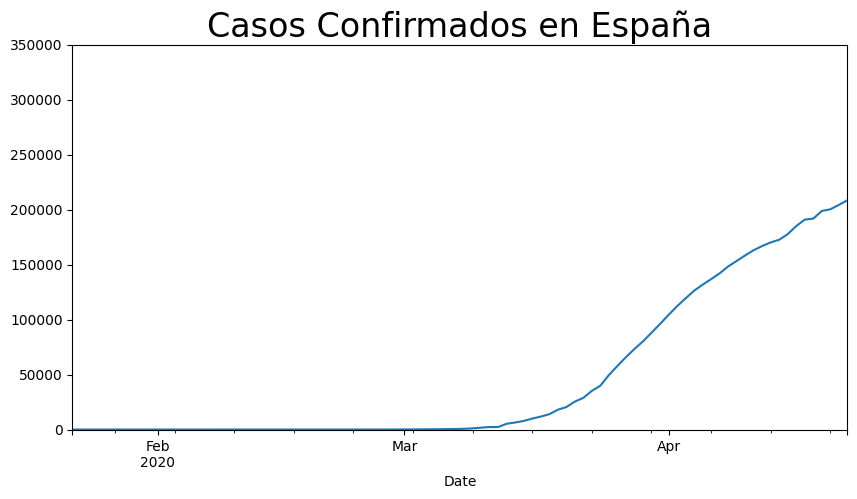

In [21]:
df.ConfirmedCases.plot(figsize=(10,5))
plt.title("Casos Confirmados en España", size = 24)
plt.ylim(0,350000)
plt.show()

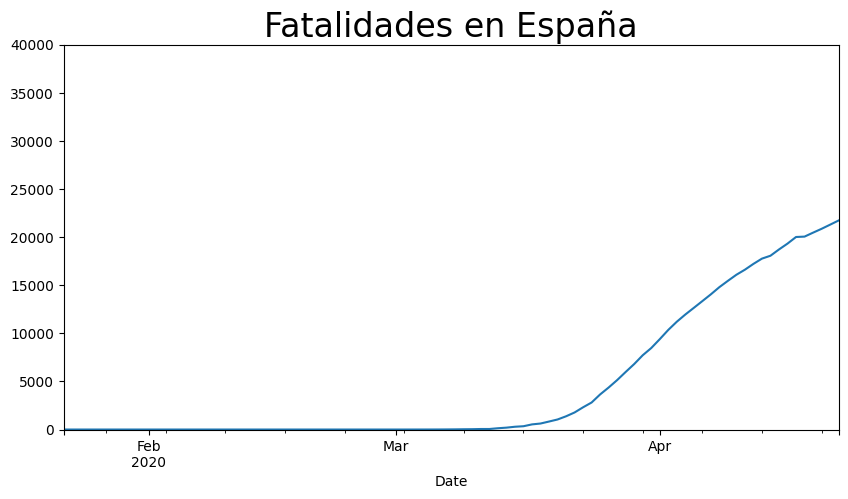

In [22]:
df.Fatalities.plot(figsize=(10,5))
plt.title("Fatalidades en España", size = 24)
plt.ylim(0,40000)
plt.show()

In [23]:
!pip install pmdarima
from pmdarima.arima import auto_arima

In [24]:
model_auto = auto_arima(df.ConfirmedCases, m = 5,
                       max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, information_criterion = 'aic')

In [25]:
model_auto

ARIMA(order=(1, 2, 0), scoring_args={}, seasonal_order=(0, 0, 0, 5),
      suppress_warnings=True, with_intercept=False)

In [26]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   92
Model:               SARIMAX(1, 2, 0)   Log Likelihood                -763.374
Date:                Fri, 15 Mar 2024   AIC                           1530.747
Time:                        21:44:55   BIC                           1535.747
Sample:                    01-22-2020   HQIC                          1532.763
                         - 04-22-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5816      0.052    -11.158      0.000      -0.684      -0.479
sigma2      1.377e+06   9.31e+04     14.786      0.000    1.19e+06    1.56e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):               253.96
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):        33784881.51   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
#Creando el indice del futuro
date = pd.to_datetime("04-23-2020")
date

Timestamp('2020-04-23 00:00:00')

In [28]:
i_date=date + pd.to_timedelta(np.arange(20), 'D')

In [29]:
i_date

DatetimeIndex(['2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
               '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12'],
              dtype='datetime64[ns]', freq=None)

In [30]:
predictions=model_auto.predict(len(i_date))

In [31]:
df_test = pd.Series(predictions, index=i_date)
df_test.head()

2020-04-23    212458.675438
2020-04-24    216610.542777
2020-04-25    220714.608740
2020-04-26    224846.475149
2020-04-27    228962.173303
dtype: float64

In [32]:
df_auto_pred = pd.DataFrame({'Predictions': predictions},
                            index = i_date)

In [33]:
df_auto_pred.head()

,Predictions
2020-04-23,212458.675438
2020-04-24,216610.542777
2020-04-25,220714.608740
2020-04-26,224846.475149
2020-04-27,228962.173303


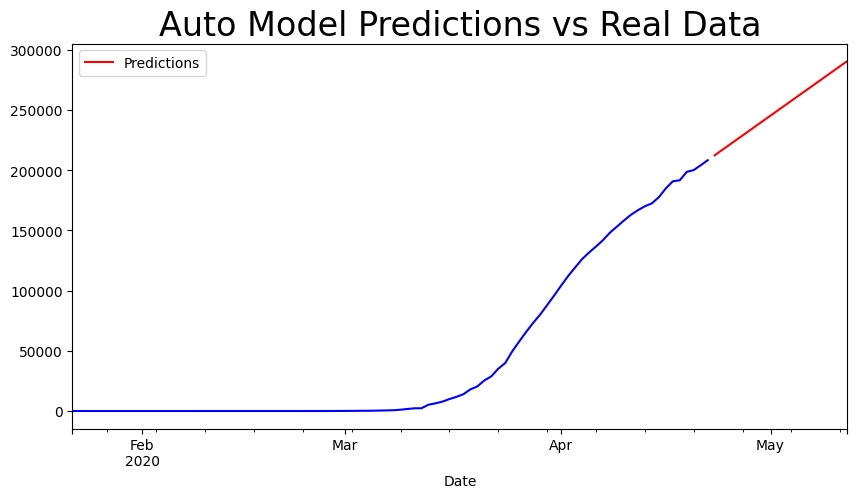

In [34]:
df_auto_pred.plot(figsize = (10,5), color = "red")
df.ConfirmedCases.plot(color = "blue")
plt.title("Auto Model Predictions vs Real Data", size = 24)
plt.show()

## Usando Prophet con los datos de Mexico


In [35]:
df_m = train[train['Country_Region'] == 'Mexico']

In [36]:
len(df_m)

92

In [37]:
df_m.head()

,Country_Region,Date,ConfirmedCases,Fatalities
15916,Mexico,2020-01-22,0.0,0.0
15917,Mexico,2020-01-23,0.0,0.0
15918,Mexico,2020-01-24,0.0,0.0
15919,Mexico,2020-01-25,0.0,0.0
15920,Mexico,2020-01-26,0.0,0.0


In [38]:
confirmed_m=df_m.groupby('Date')['ConfirmedCases'].sum().to_frame().reset_index()

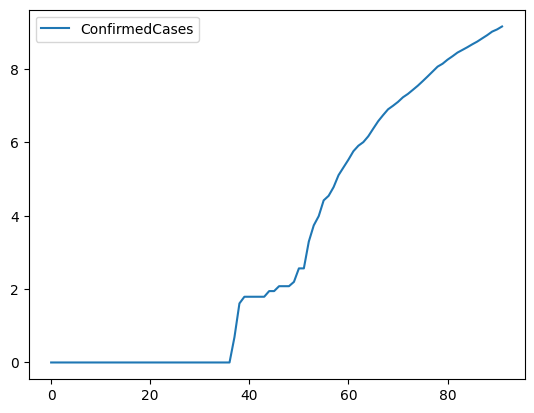

In [39]:
confirmed_m['ConfirmedCases'] = np.log(1+confirmed_m['ConfirmedCases'])
confirmed_m.plot()
plt.show()

In [40]:
confirmed_m.columns = ['ds','y']
confirmed_m['ds'] = pd.to_datetime(confirmed_m['ds'])
confirmed_m.tail()

,ds,y
87,2020-04-18,8.835792
88,2020-04-19,8.922392
89,2020-04-20,9.019422
90,2020-04-21,9.079434
91,2020-04-22,9.159258


In [41]:
model_m = Prophet(interval_width=0.95)
model_m.fit(confirmed_m)
future_m = model_m.make_future_dataframe(periods=30)
future_confirmed_m = future_m.copy() 
future_m

21:44:56 - cmdstanpy - INFO - Chain [1] start processing
21:44:56 - cmdstanpy - INFO - Chain [1] done processing


,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
117,2020-05-18
118,2020-05-19
119,2020-05-20
120,2020-05-21


In [42]:
forecast_m = model_m.predict(future_m)
forecast_m[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-0.086404,-0.521239,0.327613
1,2020-01-23,-0.086878,-0.487466,0.320049
2,2020-01-24,-0.056851,-0.494157,0.373222
3,2020-01-25,0.030583,-0.408449,0.465883
4,2020-01-26,0.045468,-0.382633,0.472391


/home/bbchanchis/curso-series-temporales/venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/bbchanchis/curso-series-temporales/venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


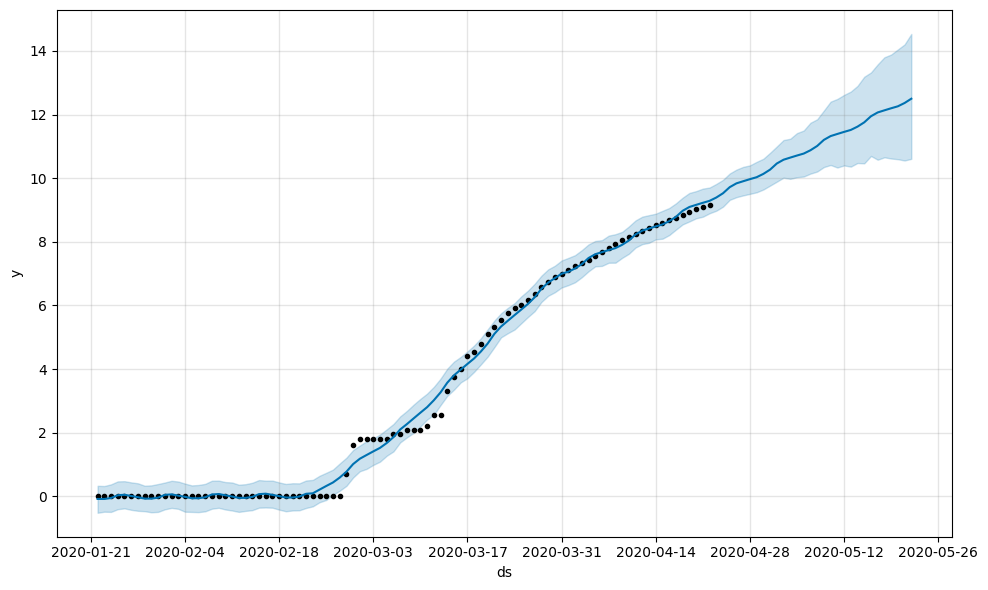

In [43]:
confirmed_forecast_plot = model_m.plot(forecast_m)

# Fatalities

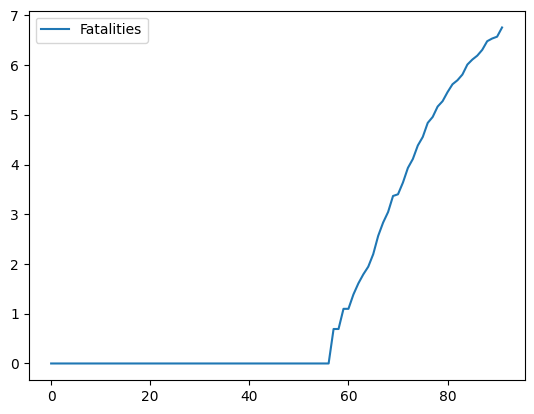

In [44]:
confirmed_m=df_m.groupby('Date')['Fatalities'].sum().to_frame().reset_index()
confirmed_m['Fatalities'] = np.log(1+confirmed_m['Fatalities'])
confirmed_m.plot()
plt.show()

21:44:57 - cmdstanpy - INFO - Chain [1] start processing


21:44:57 - cmdstanpy - INFO - Chain [1] done processing
/home/bbchanchis/curso-series-temporales/venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/bbchanchis/curso-series-temporales/venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


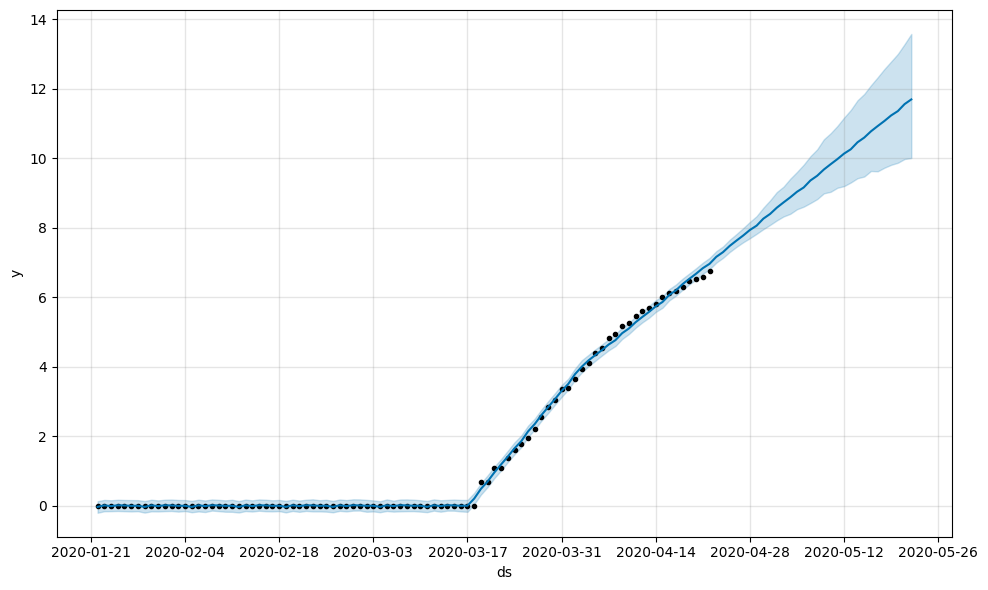

In [45]:
confirmed_m.columns = ['ds','y']
confirmed_m['ds'] = pd.to_datetime(confirmed_m['ds'])
model_m = Prophet(interval_width=0.95)
model_m.fit(confirmed_m)
future_m = model_m.make_future_dataframe(periods=30)
future_confirmed_m = future_m.copy() 
forecast_m = model_m.predict(future_m)
confirmed_forecast_plot = model_m.plot(forecast_m)